In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
df= pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [30]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [31]:
# Drop day, month and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [32]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
# Encoding "Calsses" column
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [34]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [35]:
# Creating dependent and independent features
x = df.drop('FWI', axis=1)
y=df['FWI']

In [36]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [37]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

### Feature Selection

In [38]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

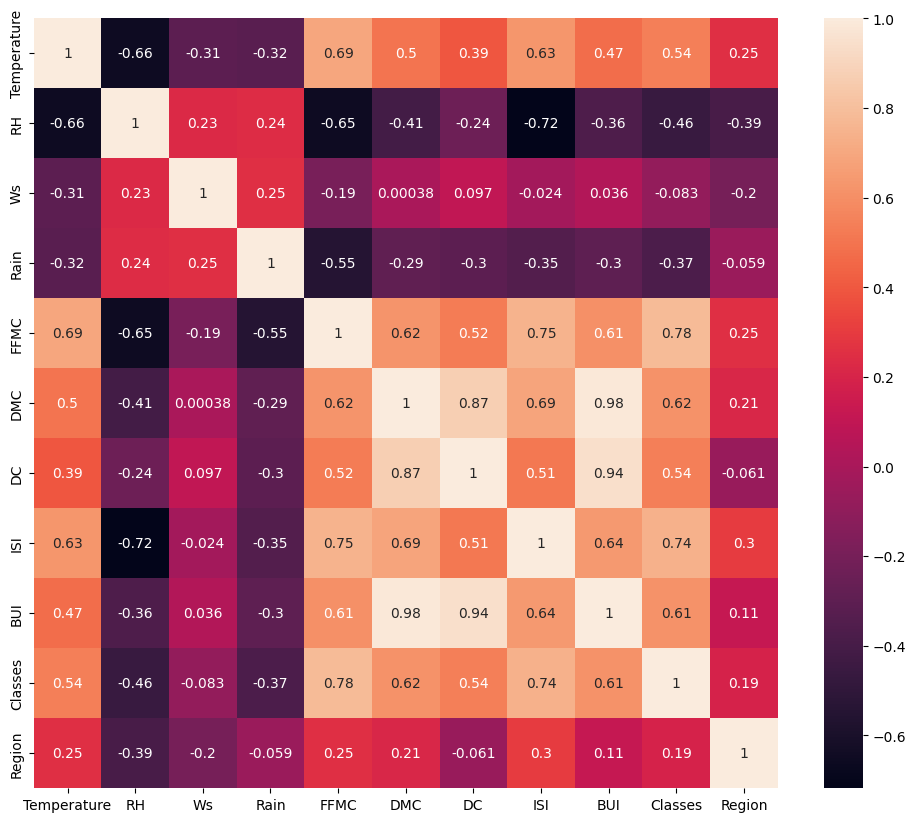

In [39]:
# Check for multicollinearity
plt.figure(figsize=(12, 10))
corr=x_train.corr()
sns.heatmap(corr, annot=True)


In [40]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(x_train, 0.85)
corr_features

{'BUI', 'DC'}

In [42]:
# Frop the features that are having the correlation more tha 0.85

x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)



In [43]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

### Linear Regression Model

MAE :  0.5468236465249977
Score :  0.9847657384266952


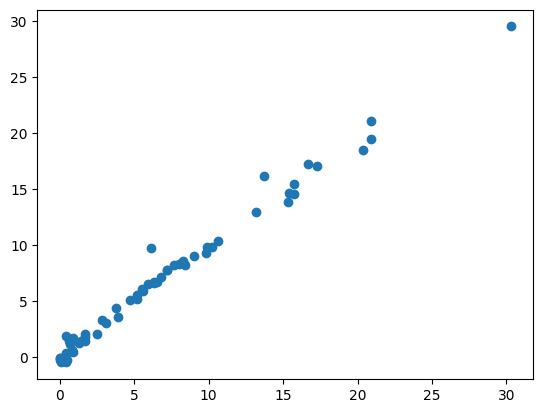

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
score  =r2_score(y_test, y_pred)
print("MAE : ", mae)
print("Score : ",score)

plt.scatter(y_test, y_pred)

### Lasso Regression

MAE :  0.8037639060665965
Score :  0.9693168543156115


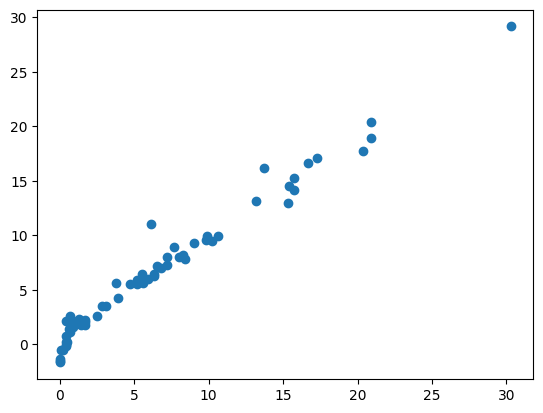

In [45]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
score  =r2_score(y_test, y_pred)
print("MAE : ", mae)
print("Score : ",score)

plt.scatter(y_test, y_pred)

### Cross Validation Lasso

In [46]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(x_train, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [47]:
lassocv.alpha_

np.float64(0.08500906653785777)

MAE :  0.5792177731660033
Score :  0.9816701594315774


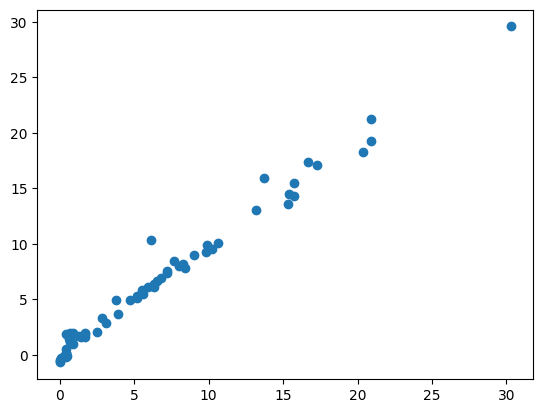

In [49]:
y_pred = lassocv.predict(x_test)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score  =r2_score(y_test, y_pred)
print("MAE : ", mae)
print("Score : ",score)

### Ridge Regression Model

MAE :  0.5792177731660033
Score :  0.9816701594315774


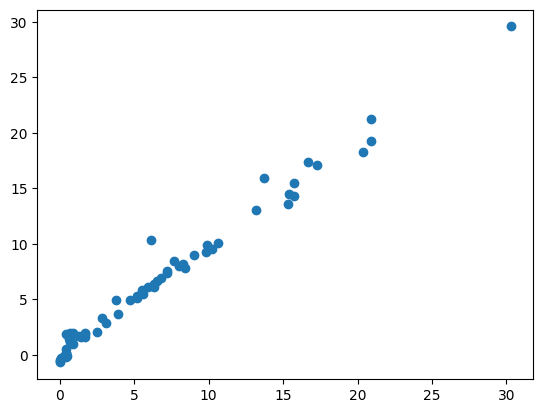

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(x_train, y_train)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("MAE : ", mae)
print("Score : ",score)

plt.scatter(y_test, y_pred)

MAE :  0.5467125913540914
Score :  0.9838726362953031


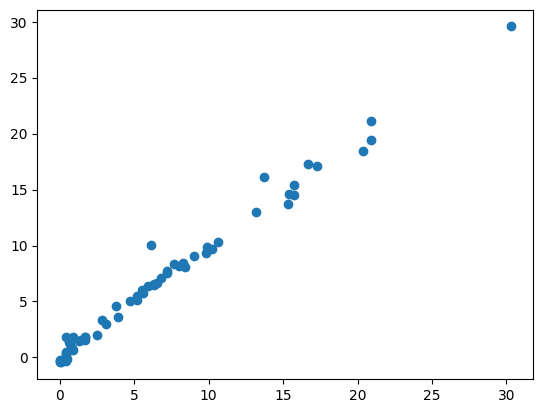

In [53]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=10)
ridgecv.fit(x_train, y_train)
y_pred = ridgecv.predict(x_test)

plt.scatter(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("MAE : ", mae)
print("Score : ",score)

In [54]:
 ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

### ElasticNet Regression

MAE :  0.7817010910407279
Score :  0.9690550386006982


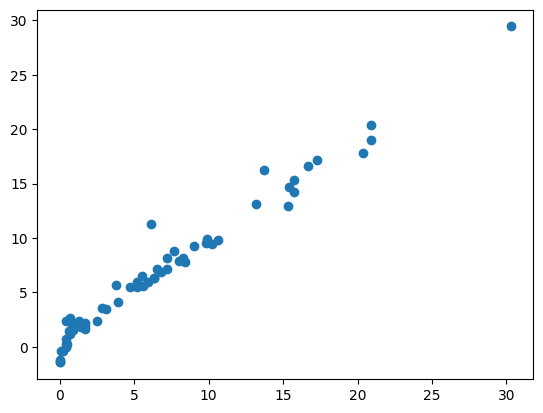

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(x_train, y_train)
y_pred = elastic.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("MAE : ", mae)
print("Score : ",score)

plt.scatter(y_test, y_pred)

MAE :  0.5967287618208285
Score :  0.9804049458048055


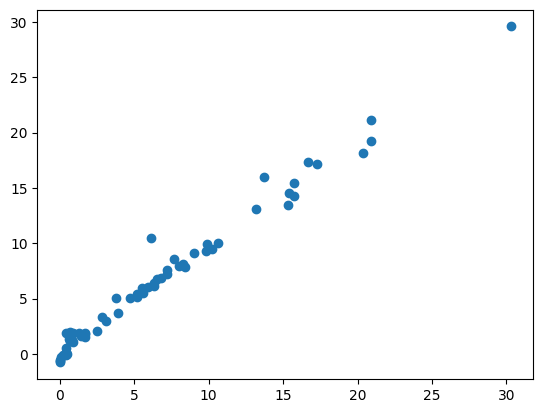

In [57]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv=5)

elasticcv.fit(x_train, y_train)
y_pred = elasticcv.predict(x_test)

plt.scatter(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("MAE : ", mae)
print("Score : ",score)


### Pickling the machine learning models, preprocessing models, StandardScaler

In [58]:
import pickle 
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))

NameError: name 'scaler' is not defined